<a href="https://colab.research.google.com/github/saffarizadeh/INSY4054/blob/main/Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://saffarizadeh.com/Logo.png" width="300px"/>

# *INSY 4054: Emerging Technologies*

# **Trained Models and Transfer Learning**

Instructor: Dr. Kambiz Saffarizadeh

---

Source: https://tfhub.dev/google/tf2-preview/inception_v3/classification/4

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_hub as hub

In [ ]:
inception_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/classification/4", output_shape=[1001])
])
inception_model.build([None, 299, 299, 3])  # Batch input shape.

Classes used in this model: https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

We need to download an image to use as an input for the classifier.

In [ ]:
!wget https://images.newscientist.com/wp-content/uploads/2020/09/22145012/big-frog-eyes.jpg

--2021-02-22 16:33:04--  https://images.newscientist.com/wp-content/uploads/2020/09/22145012/big-frog-eyes.jpg
Resolving images.newscientist.com (images.newscientist.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to images.newscientist.com (images.newscientist.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54089 (53K) [image/jpeg]
Saving to: ‘big-frog-eyes.jpg’

big-frog-eyes.jpg   100%[===================>]  52.82K  --.-KB/s    in 0.01s   

2021-02-22 16:33:05 (4.16 MB/s) - ‘big-frog-eyes.jpg’ saved [54089/54089]



Next, we load and resize the image.

In [ ]:
image_d = tf.keras.preprocessing.image.load_img('big-frog-eyes.jpg', target_size=(299, 299))

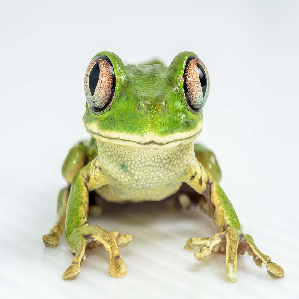

In [ ]:
image_d

Now, we convert this image object to a numpy array.
At the same time we devide the values by 255.0 to make sure they are float and range from 0 to 1.

In [ ]:
image_array = tf.keras.preprocessing.image.img_to_array(image_d) / 255.0

In [ ]:
image_array.shape

(299, 299, 3)

The shape of the image is `(299, 299, 3)` but our model expects `(__, 299, 299, 3)`.
So we can reshape the input to add one more dimension

In [ ]:
image_array1 = image_array.reshape(1,299,299,3)

# OR

image_array2 = image_array[tf.newaxis, ...]

Now, we can just send this image to the model and get the output.

In [ ]:
output = inception_model(image_array2)

In [ ]:
output.shape

TensorShape([1, 1001])

The output contains 1001 number, which makes it hard to find the maximum.
We can use the argmax function from numpy to find the index of the element with the highest value.

In [ ]:
np.argmax(output.numpy())

32

Now we can see what the class this `32` actually represend by checking the class labels: https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

To do this automatically, we use the following code (we learn how to do this in the Automation module).

In [ ]:
import requests
classes = requests.get('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt').text.split('\n')
classes[np.argmax(output.numpy())]

'tree frog'